In [192]:
import gym
import matplotlib.pyplot as plt

env = gym.make('CartPole-v1', render_mode="rgb_array")
observation = env.reset()
NFRAMES = 4
print("Available actions:", env.action_space.n)
for action in range(env.action_space.n):
    print(f"Action {env.action_space.sample()}")
# action 0 gauche et action 1 droite

''' On recupere NFRAMES frames (4 ici)'''
def get_frames(func, nframes):
    processed_frames = []
    
    # Reset environment and get initial observation
    observation = env.reset()[0]
    print(f'obs: {observation}')
    
    processed_frames.append(func(env, observation))
    
    # Enter loop to take actions and get subsequent observations
    for i in range(1, nframes):  # Start from 1 because the first observation is already processed
        # Take a random action
        action = env.action_space.sample()
        print(f'env.step(action) {env.step(action)}')
        action_res = env.step(action)
        action_res = action_res[0:4]
        print(action_res)
        observation, reward, done, info = action_res
        
        # Append processed frame
        processed_frames.append(func(env, observation))
        
        # Break if episode is done
        if done:
            break

    env.close()
    return processed_frames


# Function to display list of frames
def display_list_frames(frames):
    fig, axes = plt.subplots(1, len(frames), figsize=(30, 6))
    for i, frame in enumerate(frames):
        axes[i].imshow(frame)
        axes[i].axis('off')
    plt.show()


Available actions: 2
Action 1
Action 1


In [193]:
import numpy as np

def custom_render(env, obs):
    # Unpack observation
    print('INSIDE CUSTOM RENDER RN')
    print(f'obs: {obs}')
    print(f'amount of observations: {len(obs)}')
    print(f'cart position: {obs[0]}')
    print(f'pole angle: {obs[2]}')

    cart_x = obs[0]
    pole_angle = obs[2]
    
    # Modify the pole angle for visualization
    visual_pole_angle = np.degrees(pole_angle) * 2  # Double the angle for visualization
    
    # Render the environment
    env.render()
    
    # Draw the cart and pole with modified angle
    cart_width = 0.4
    cart_height = 0.2
    pole_length = 1.0
    pole_x = cart_x
    pole_y = 0.1  # Height of the cart
    pole_end_x = pole_x + pole_length * np.sin(np.radians(visual_pole_angle))
    pole_end_y = pole_y + pole_length * np.cos(np.radians(visual_pole_angle))
    
    # Draw the cart
    plt.gca().add_patch(plt.Rectangle((cart_x - cart_width / 2, 0), cart_width, cart_height, fill=True, color='blue'))
    
    # Draw the pole
    plt.plot([pole_x, pole_end_x], [pole_y, pole_end_y], color='red', linewidth=3)
    
    # Set plot limits
    plt.xlim(-2.5, 2.5)
    plt.ylim(0, 2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    
    # Update the display
    plt.pause(0.01)
    print('EXITING CUSTOM RENDER RN')

obs: [-0.01700919 -0.04007174  0.00449812  0.04710956]
INSIDE CUSTOM RENDER RN
obs: [-0.01700919 -0.04007174  0.00449812  0.04710956]
amount of observations: 4
cart position: -0.01700918935239315
pole angle: 0.004498116672039032


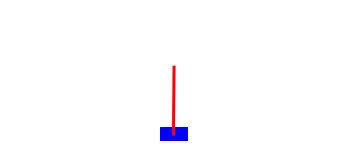

EXITING CUSTOM RENDER RN
env.step(action) (array([-0.01781062, -0.23525791,  0.00544031,  0.34120828], dtype=float32), 1.0, False, False, {})
(array([-0.02251578, -0.43045685,  0.01226447,  0.63560176], dtype=float32), 1.0, False, False)
INSIDE CUSTOM RENDER RN
obs: [-0.02251578 -0.43045685  0.01226447  0.63560176]
amount of observations: 4
cart position: -0.022515783086419106
pole angle: 0.012264473363757133


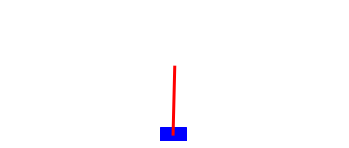

EXITING CUSTOM RENDER RN
env.step(action) (array([-0.03112492, -0.6257477 ,  0.02497651,  0.9321217 ], dtype=float32), 1.0, False, False, {})
(array([-0.04363987, -0.82119757,  0.04361894,  1.2325474 ], dtype=float32), 1.0, False, False)
INSIDE CUSTOM RENDER RN
obs: [-0.04363987 -0.82119757  0.04361894  1.2325474 ]
amount of observations: 4
cart position: -0.04363987222313881
pole angle: 0.04361894354224205


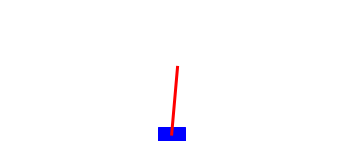

EXITING CUSTOM RENDER RN
env.step(action) (array([-0.06006382, -1.0168525 ,  0.06826989,  1.5385705 ], dtype=float32), 1.0, False, False, {})
(array([-0.08040088, -1.2127262 ,  0.09904131,  1.8517525 ], dtype=float32), 1.0, False, False)
INSIDE CUSTOM RENDER RN
obs: [-0.08040088 -1.2127262   0.09904131  1.8517525 ]
amount of observations: 4
cart position: -0.08040087670087814
pole angle: 0.09904130548238754


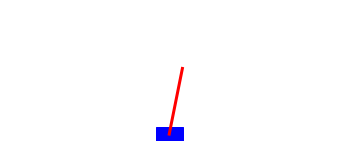

EXITING CUSTOM RENDER RN


TypeError: Image data of dtype object cannot be converted to float

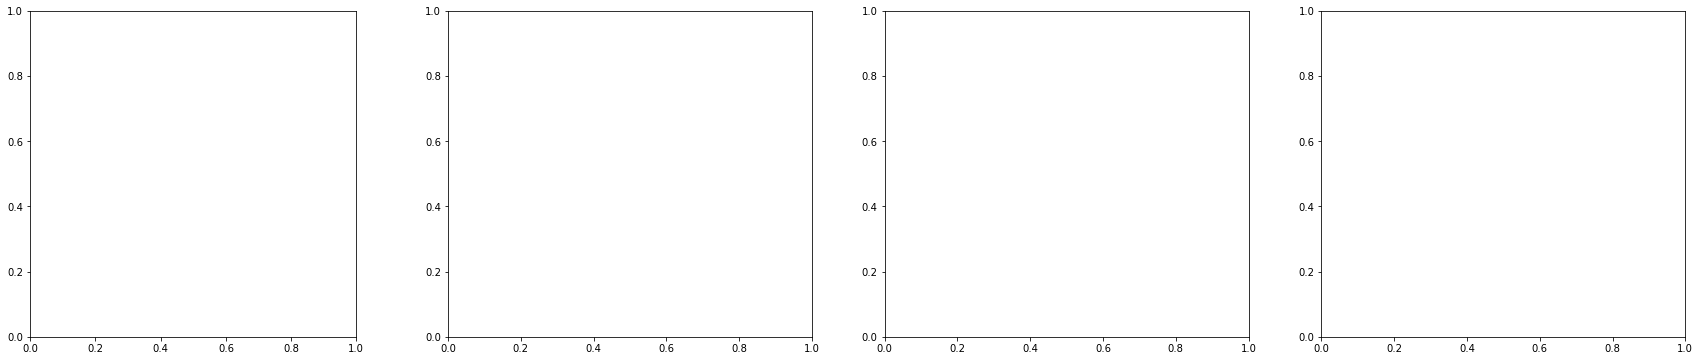

In [194]:
''' PREPROCESSING'''
import numpy as np
from skimage.color import rgb2gray
from skimage.transform import resize

# Function to preprocess a single frame
def preprocess_frame(frame):
    # Convert to grayscale
    gray_frame = rgb2gray(frame)
    # Resize to a fixed size (e.g., 84x84)
    resized_frame = resize(gray_frame, (84, 84), anti_aliasing=True)
    # Scale pixel values to [0, 1]
    preprocessed_frame = resized_frame.astype(np.float32) / 255.0
    return preprocessed_frame

frames = get_frames(custom_render, NFRAMES)
print(f'MANAGED TO GET ALL {NFRAMES} frames')

# Display frames
display_list_frames(frames)